### PCA

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [3]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


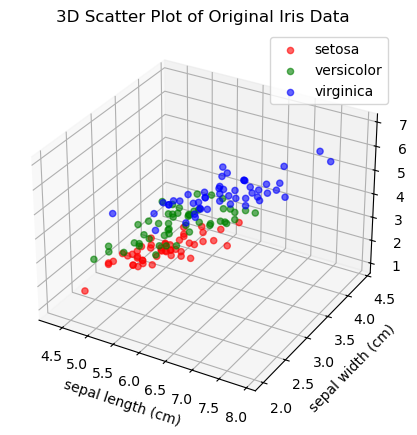

In [4]:
# Plot the original data in 3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for i in range(len(colors)):
    subset = df[df['target'] == i]
    ax.scatter(subset[feature_names[0]], subset[feature_names[1]], subset[feature_names[2]], c=colors[i], label=iris.target_names[i], alpha=0.6)

ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])
plt.title('3D Scatter Plot of Original Iris Data')
plt.legend()
plt.show()

In [5]:
X = df.drop('target', axis=1)
y = df['target']

In [6]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [8]:
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [9]:
X_pca.ndim

2

In [10]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['target'] = y

In [11]:
df_pca

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


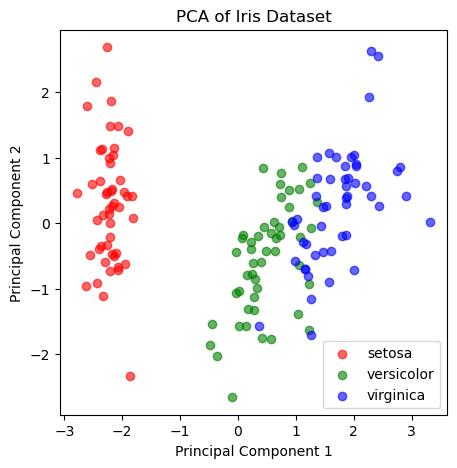

In [12]:
# Plot the PCA results
plt.figure(figsize=(5,5))
for i in range(len(colors)):
    subset = df_pca[df_pca['target'] == i]
    plt.scatter(subset['PC1'], subset['PC2'], c=colors[i], label=iris.target_names[i], alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()


### U-MAP

In [ ]:
!pip install umap-learn

In [13]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from umap import UMAP

In [14]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
# Create a DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y


In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


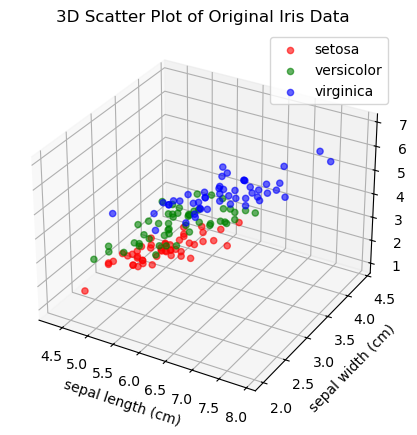

In [16]:
# Plot the original data in 3D
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for i in range(len(colors)):
    subset = df[df['target'] == i]
    ax.scatter(subset[feature_names[0]], subset[feature_names[1]], subset[feature_names[2]], c=colors[i], label=iris.target_names[i], alpha=0.6)

ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])
plt.title('3D Scatter Plot of Original Iris Data')
plt.legend()
plt.show()

In [17]:
X = df.drop('target', axis=1)
y = df['target']

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

C:\Users\gusai\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [20]:
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['target'] = y

In [21]:
df_umap

,UMAP1,UMAP2,target
0,9.115955,9.151890,0
1,8.730103,6.617208,0
2,9.366394,7.095590,0
3,9.235978,6.742476,0
4,9.262432,9.417662,0
...,...,...,...
145,-7.730651,1.148942,2
146,-7.366601,-0.944730,2
147,-7.258650,0.782232,2
148,-8.157436,0.647432,2


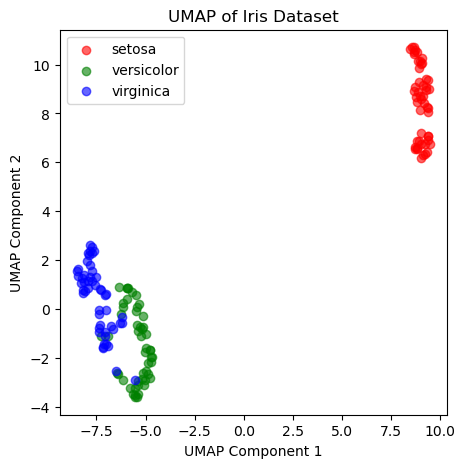

In [22]:
# Plot the UMAP results
plt.figure(figsize=(5,5))
colors = ['r', 'g', 'b']
for i in range(len(colors)):
    subset = df_umap[df_umap['target'] == i]
    plt.scatter(subset['UMAP1'], subset['UMAP2'], c=colors[i], label=iris.target_names[i], alpha=0.6)

plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of Iris Dataset')
plt.legend()
plt.show()